<a href="https://colab.research.google.com/github/alanrolemberg/mvp-analise_de_dados/blob/main/MVP_Analise_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pontifícia Universidade Católica do Rio de Janeiro - PUC - RJ**

**Ano: 2023**

**Sprint: Análise de dados e boas práticas**

------------------------------------------------------------------------------

**MVP**

**Aluno: ALAN ROLEMBERG ELIODORIO**

------------------------------------------------------------------------------
**Dataset:** Solar Power Generation Data

**Fonte: **https://www.kaggle.com/datasets/anikannal/solar-power-generation-data

#***1. Definição do problema***



>>   ***Qual é a descrição do problema?***
    Atualmente temos uma crescente número de empreendimentos e até residências que optaram por investir em uma infraestrutura própria de geração de energia solar. Essa geração é feita através da instalação de células fotovoltaicas e inversores, que realizam geração, conversão e transporte de energia para a rede de uso comum.
    Os problemas elencados são:
    
  >>- Realizar a descoberta de quais os melhores momentos (faixas horárias) para a geração de energia solar nas plantas de origem dos dados.
  
  >>- Verificar se a relação de conversão DC / AC feita pelo inversor é estável. Se não, tentar achar uma variável que possa estar influenciando na estabilidade como hora, quantidade de geração, índice de irradiação ou temperatura.
  
  >>- Verificar se há correlação entre produção de energia e demais variáveis.

>>  ***Este é um problema de aprendizado supervisionado ou não supervisionado?***
    Este problema não envolve aprendizado de máquina, pois é um problema que pode ser resolvido apenas com análise de dados.

>>  ***Que premissas ou hipóteses você tem sobre o problema?***
    Temos como hipótese que a geração de energia é estável, ou seja, que ela não sofre variações conforme o volume de geração.

>>  ***Que restrições ou condições foram impostas para selecionar os dados?***
    
  >>- Os dados são fruto de coleta a cada 15 minutos, dando origem a uma série temporal.
  >>- Os dados existentes são acumulativos, ou seja, são incrementados de uma coleta para a outra. Teremos que trabalhar com esses dados dessa forma, ou gerando DELTAS se for necessário somá-los.
    

>>  ***Defina cada um dos atributos do dataset:***

>>> DATE_TIME: DATA e HORA da coleta;

>>>  DC_Power: O total de energia gerada em DC;

>>>  AC_Power: O total de energia convertida em AC, após conversão realizada por um inversor;

>>>  DAILY_YIELD: O total de energia acumulada para o dia corrente;

>>>  TOTAL_YIELD: O total de energia acumulada;

>>>  AMBIENT_TEMPERATURE: Temperatura ambiente;

>>>  MODULE_TEMPERATURE: Temperatura do módulo;

>>>  IRRADIATION: índice de irradiação solar.




#***2. Carga de Dados e pré-processamento***

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import missingno as ms # para tratamento de missings
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Carrega arquivo csv usando Pandas usando uma URL

# Informa a URL de importação do dataset
url1 = "http://raw.githubusercontent.com/alanrolemberg/mvp-analise_de_dados/main/Plant_1_Generation_Data.csv"
url2 = "http://raw.githubusercontent.com/alanrolemberg/mvp-analise_de_dados/main/Plant_1_Weather_Sensor_Data.csv"

# Informa o cabeçalho das colunas
colunas1 = ['DATE_TIME','PLANT_ID','SOURCE_KEY','DC_POWER','AC_POWER','DAILY_YIELD','TOTAL_YIELD']
colunas2 = ['DATE_TIME','PLANT_ID','SOURCE_KEY','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']


>Vamos montar o **dataset1**, que contém os dados de produção de energia.

In [4]:
# Lê o arquivo origem de alguns dos dados
dataset1 = pd.read_csv(url1, names=colunas1, skiprows=1, delimiter=',')
dataset1['DATE_TIME'] = pd.to_datetime(dataset1['DATE_TIME'],format='%d-%m-%Y %H:%M')
dataset1

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


> Vamos agora montar o **dataset2**, que contém os dados de temperatura e irradiação solar. Notamos que o **dataset2** precisa de um **pré-processamento** através da cláusula format, para que o formato de data/hora seja reconhecido e depois convertido para o mesmo formato de data/hora de **dataset1**, operação que faremos logo abaixo:

In [5]:
# Lê o arquivo origem da segunda parte dos dados
dataset2 = pd.read_csv(url2, names=colunas2, skiprows=1, delimiter=',')
dataset2['DATE_TIME'] = pd.to_datetime(dataset2['DATE_TIME'],format='%Y-%m-%d %H:%M:%S') #Format da segunda tabela é diferente, ajustando aqui
dataset2

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


# ***3. Join das duas fontes de dados***

> Vamos agora montar o **dataset_merged**, que contém o JOIN em sql style das nossa duas fontes de dados, a partir das colunas comuns ['DATE_TIME','PLANT_ID','SOURCE_KEY'] sendo usadas como chave.

In [6]:
# Usar Merge, join ou concat pra unir com o segundo
dataset_merged = dataset1.merge(dataset2,on=['DATE_TIME','PLANT_ID','SOURCE_KEY'])

dataset_merged.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION


> **DESCOBERTA:** Obtivemos um resultado **VAZIO** no merge dos dados, o que nos levou notar uma questão: A coluna SOURCE_KEY não coincide nas duas fontes de dados, o que nos dá a entender que o equipamento que faz a coleta dos dados de produção de energia não é o mesmo equipamento que faz a coleta dos dados de temperatura e irradiação solar.

>> **DECISÃO:** Vamos então modificar a forma como estamos fazendo merge dos dados, para que a coluna SOURCE_KEY não seja usada como chave. Ao mesmo tempo, vamos modificar o sufixo desta coluna, para eliminar a duplicação de nome no dataset final. Adicionamos o sufixo "_PowerSens" para a fonte de dados de energia e "_WeatherSens" para a fonte de dados de temperatura/irradiação.

In [7]:
# Usar Merge, join ou concat pra unir com o segundo
# dataset_merged = dataset.merge(dataset2,on=['DATE_TIME','PLANT_ID','SOURCE_KEY']) # Comentamos este trecho e substituímos pelo de baixo
dataset_merged = dataset1.merge(dataset2,on=['DATE_TIME','PLANT_ID'],suffixes=("_PowerSens","_WeatherSens"))

dataset_merged

,DATE_TIME,PLANT_ID,SOURCE_KEY_PowerSens,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_WeatherSens,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
...,...,...,...,...,...,...,...,...,...,...,...
68769,2020-06-17 23:45:00,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68770,2020-06-17 23:45:00,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68771,2020-06-17 23:45:00,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0
68772,2020-06-17 23:45:00,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,HmiyD2TTLFNqkNe,21.909288,20.427972,0.0


# ***4. Análise de dados***

> **4.1 ANÁLISE DE VALORES FALTANTES E INCONSISTENTES:**
- Verificando as primeiras linhas do dataset, vemos algo que nos chama atenção. Temos um grande conjunto de valores de geração de energia solar (DC_POWER, AC_POWER e DAILY_YIELD) **com valor zero**. Em um primeiro olhar isso nos parece um problema de coleta, ou de qualidade de dados. Mas em uma última análise, podemos notar que esses registros estão corretos, pois estão localizados justamente nos momento de linha temporal onde não há geração de energia solar (a noite). Notamos também que o atributo de irradiação solar (IRRADIATION) também é de zero, o que nos mostra que o dado demonstra consistência entre esses dois atributos.
- Encontramos alguns atributos com um valores muito acima da média. Esses atributos serão tratados no decorrer da análise.

> **4.2 COMPUTAÇÃO DE VALOR DERIVADO (COMPUTE DERIVED VALUE):** Podemos também realizar a computação de um valor derivado, que represente se a conversão da voltagem DC para a AC é estável. Esse parâmetro vai se chamar DC-AC-Conv.

In [8]:
dataset_merged["DC-AC-Conv"] = dataset_merged["DC_POWER"]/dataset_merged["AC_POWER"]

dataset_merged["DC-AC-Conv"].describe()

count    36823.000000
mean        10.233666
std          0.048176
min          9.381550
25%         10.202579
50%         10.220237
75%         10.248117
max         10.465522
Name: DC-AC-Conv, dtype: float64

> **DESCOBERTA:** A conversão de DC para AC feita pelo inversor não sofre  uma variação muito grande, tendo como valor mínimo 9.381550 e valor máximo 10.465522 , mostrando que a função de inversão é feita sempre com uma relação próxima de 10. Ou seja, a perda no inversor é pequena, e ocorre em uma pequena quantidade de casos.

> **4.3 INFORMAÇÕES DO DATASET**

In [9]:
# Mostra as dimensões do dataset
print(dataset_merged.shape)

(68774, 12)


> **DESCOBERTA**: Este comando acima nos mostra que temos 12 atributos e 68774 instâncias de dado (linhas).

In [10]:
# Mostra as informações do dataset
print(dataset_merged.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68774 entries, 0 to 68773
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   DATE_TIME               68774 non-null  datetime64[ns]
 1   PLANT_ID                68774 non-null  int64         
 2   SOURCE_KEY_PowerSens    68774 non-null  object        
 3   DC_POWER                68774 non-null  float64       
 4   AC_POWER                68774 non-null  float64       
 5   DAILY_YIELD             68774 non-null  float64       
 6   TOTAL_YIELD             68774 non-null  float64       
 7   SOURCE_KEY_WeatherSens  68774 non-null  object        
 8   AMBIENT_TEMPERATURE     68774 non-null  float64       
 9   MODULE_TEMPERATURE      68774 non-null  float64       
 10  IRRADIATION             68774 non-null  float64       
 11  DC-AC-Conv              36823 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), ob

> **DESCOBERTA:** Os tipos de dados utilizados são datetime64(1), float64(8), int64(1), object(2). Os tipos de dado object se refer
em sempre a strings.

> **4.4 RESUMO ESTATÍSTICO**

In [11]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset_merged.describe(include='all')

,DATE_TIME,PLANT_ID,SOURCE_KEY_PowerSens,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_WeatherSens,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC-AC-Conv
count,68774,68774.0,68774,68774.000000,68774.000000,68774.000000,6.877400e+04,68774,68774.000000,68774.000000,68774.000000,36823.000000
unique,3157,NaN,22,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
top,2020-06-01 12:30:00,NaN,bvBOhCH3iADSZry,NaN,NaN,NaN,NaN,HmiyD2TTLFNqkNe,NaN,NaN,NaN,NaN
freq,22,NaN,3155,NaN,NaN,NaN,NaN,68774,NaN,NaN,NaN,NaN
first,2020-05-15 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2020-06-17 23:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,4135001.0,NaN,3147.177450,307.778375,3295.834644,6.978728e+06,NaN,25.558521,31.244997,0.232305,10.233666
std,NaN,0.0,NaN,4036.441826,394.394865,3145.220597,4.162707e+05,NaN,3.361300,12.308283,0.301948,0.048176
min,NaN,4135001.0,NaN,0.000000,0.000000,0.000000,6.183645e+06,NaN,20.398505,18.140415,0.000000,9.381550
25%,NaN,4135001.0,NaN,0.000000,0.000000,0.000000,6.512007e+06,NaN,22.724491,21.123944,0.000000,10.202579


> **ANÁLISE DO RESUMO ESTATÍSTICO:**
- A variável DATE_TIME contém um range de 34 datas diferentes (2020-05-15 00:00:00 a 2020-06-17 23:45:00). Cada data contẽm 22 registros de sensores, conforme a estatística FREQ;
- O registro PLANT_ID contêm um valor único 4135001;
- DC_POWER e AC_POWER contêm uma variabilidade muito parecida;
- AMBIENT_TEMPERATURE tem um range de 20 a 35 graus, enquanto MODULE_TEMPERATURE tem um range de 18 a 65 graus;
- IRRADIATION possui uma mediana (0,03) muito mais próxima do MIN (0,00) do que do MAX (1,22). Como há também um desvio padrão baixo (0,30) isso sugere a existência de outliers.

# ***5. Visualização da informação***

> Iremos analisar neste momento a **distribuição dos atributos** entre os seus possíveis valores. Para isto, podemos usar um histograma ou um density plot. Vamos fazê-lo via **density plot** por dar uma visão mais suave das possibilidade de atributos. Segue o código para exibição do Density Plot:

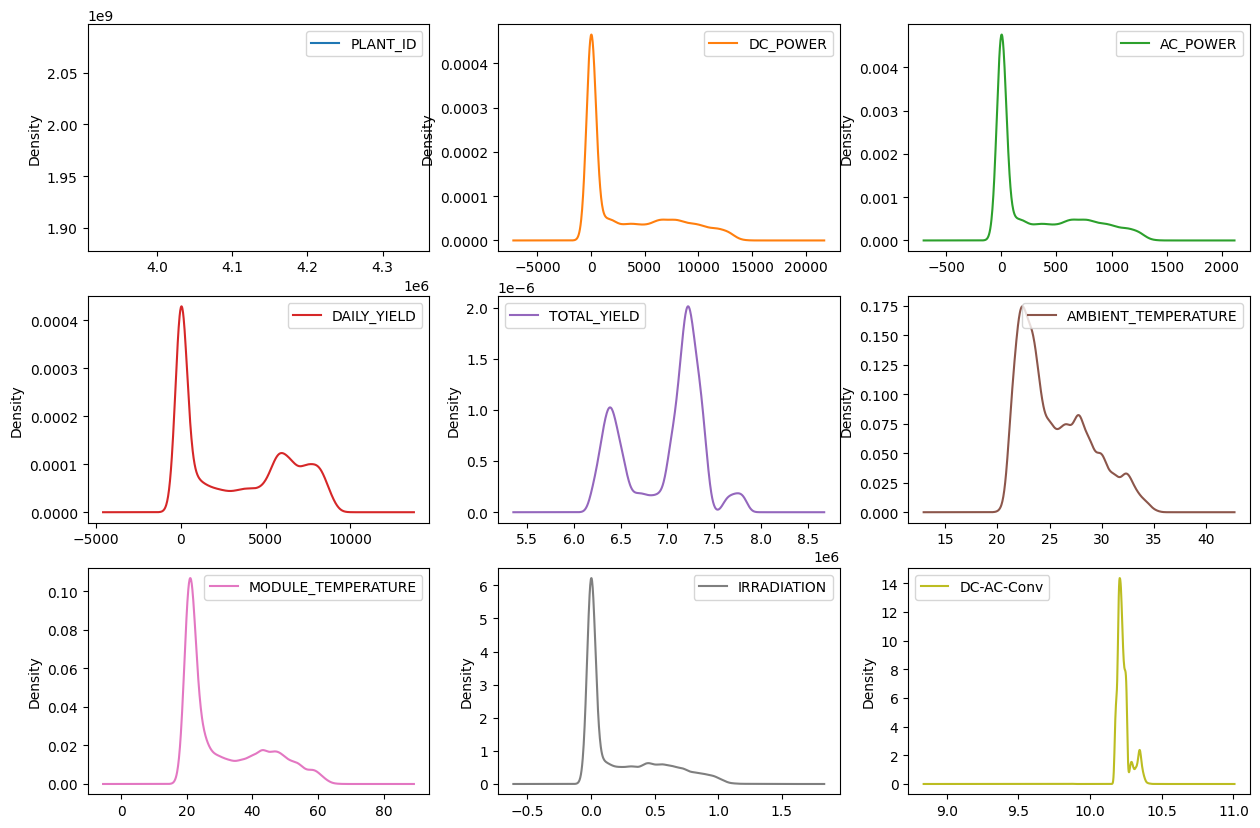

In [12]:
# Convertendo a data para string para conseguir imprimir o gráfico de densidade
dataset_tmp = pd.DataFrame(dataset_merged,copy=True)
dataset_tmp['DATE_TIME'] = pd.to_datetime(dataset_merged['DATE_TIME']).dt.strftime('%d-%m-%Y %H:%M')

# Density plot
dataset_tmp.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False, figsize = (15,10))
plt.show()

> Os atributos mais interessantes que podem ser explorados por esta visualização acima serão descritos a seguir:
- AC_POWER e DC_POWER: Estes atributos possuem um pico no valor zero devido ao fato de que a coleta noturna sempre dá zero, tornando este valor o valor de maior densidade em nossa coleta de dados. Durante o dia, o DC_POWER tem transição uniforme entre o valor zero e o valor máximo (14471.125). O AC_POWER também possui a mesa característica, com transição informe entre 0 e o valor máximo (1410.95);
- DAILY_YIELD: Este atributo também possui valor zero na maior parte dos registros devido a coleta noturna, porém ao amanhecer, ele é incrementado até o valor máximo de coleta daquele dia, tendo chegado a um pico máximo de 9163 por dia;
- AMBIENT_TEMPERATURE e MODULE_TEMPERATURE: Nos dá a medição de temperatura nos sensores e no ambiente, mostrando a variação de 20 a 35 graus no ambiente e de 18 a 65 graus no sensor. Esta visualização pode ser complementada com outras para averiguar se há superaquecimento dos sensores, ou se estes valores são normais;
- DC-AC-Conv: Este atributo foi gerado por derivação do AC_POWER e do DC_POWER. Ele nos mostra estabilidade dessa métrica no valor 10.23, mas com alguns registros desviando desta média, o que poderia sugerir que algum inversor pode estar com problemas, gerando assim perda na conversão de energia. Este dado poderia ser alvo de análises adicionais.

**ANÁLISES ADICIONAIS**

> **5.1 Relação entre AMBIENT_TEMPERATURE e MODULE_TEMPERATURE**

Iremos usar um gráfico de linhas para verificar se existe uma uniformidade de comportamento entre estes dois atributos.

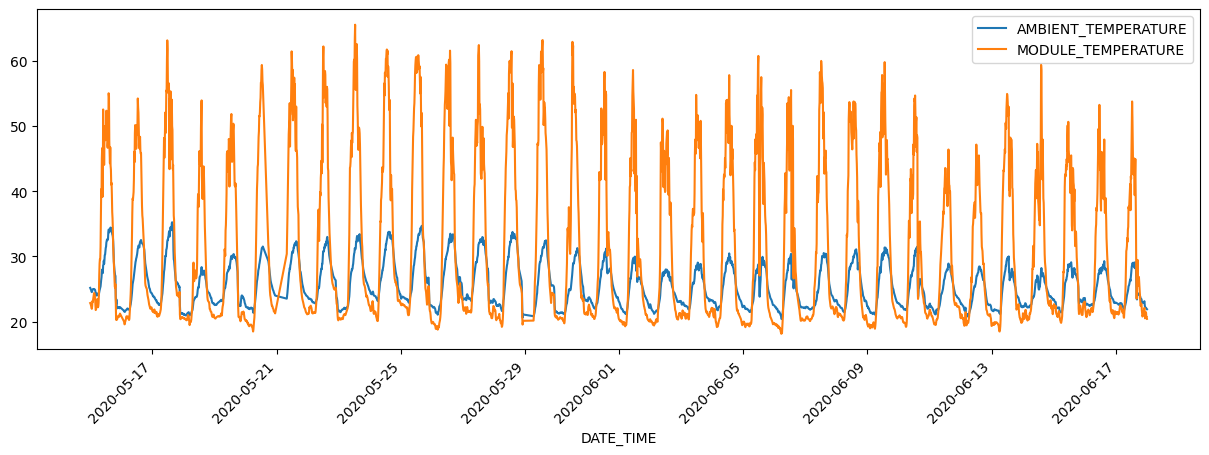

In [13]:
ax = dataset_merged.plot(kind = 'line', x="DATE_TIME", y=["AMBIENT_TEMPERATURE","MODULE_TEMPERATURE"], layout = (3,3), figsize = (15,5), rot=45)
plt.show()

> **ANÁLISE:** Conforme visto acima, o comportamento do atributo MODULE_TEMPERATURE em seus **picos** é uniforme. Sempre que o atributo AMBIENT_TEMPERATURE atinge cerca de 30 graus, o atributo MODULE_TEMPERATURE sobe até cerca de 50 graus. E em dias mais quentes, quando o atributo AMBIENT_TEMPERATURE atinge cerca de 35 graus, o atributo MODULE_TEMPERATURE atinge a casa dos 60 graus. Isso demonstra que há alguma correlação, entre os dois atributos.

> **5.2 Relação entre AC-DC-Conv, IRRADIATION, AMBIENT_TEMPERATURE e MODULE_TEMPERATURE**

> Iremos usar um **gráfico de dispersão**  para verificar a relação entre os pares de variáveis.

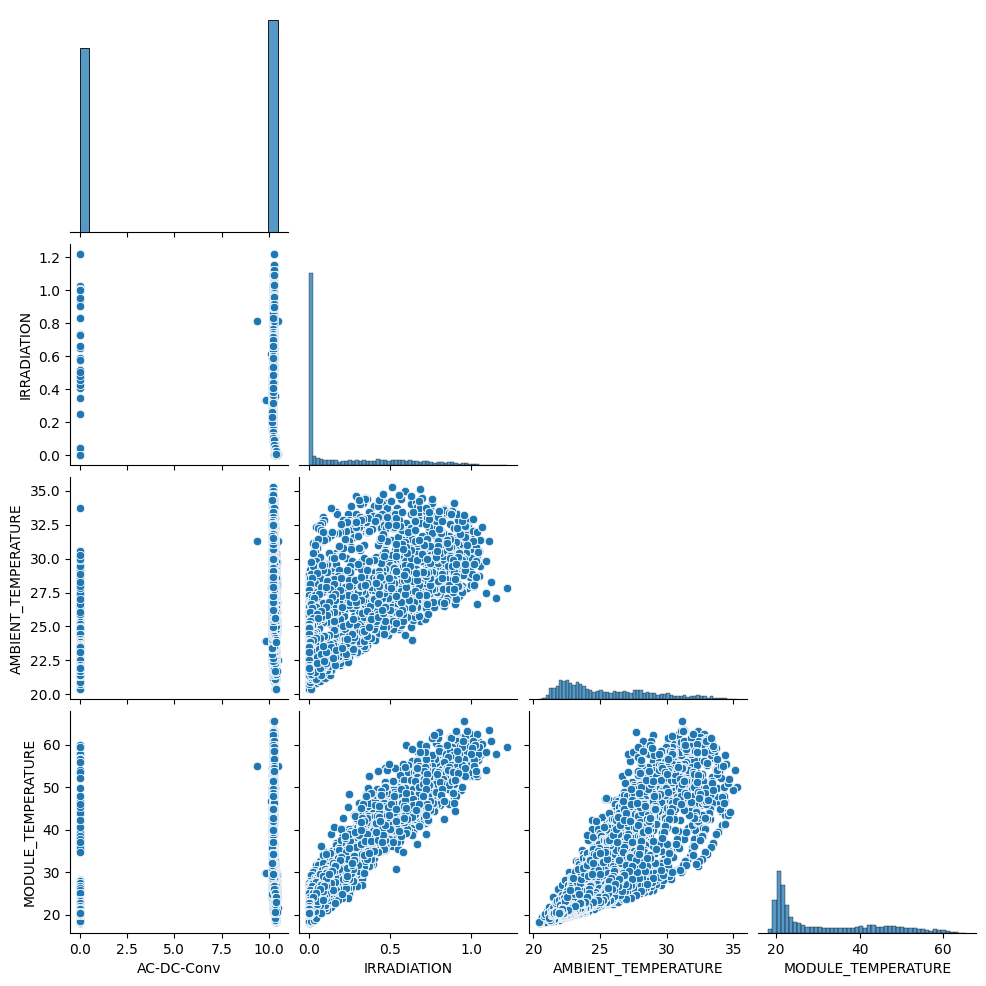

In [14]:
# Criando array específico para carga de apenas alguns atributos
array = dataset_merged.values
df = pd.DataFrame(np.column_stack((array[:,11],array[:,10],array[:,8],array[:,9])),columns=['AC-DC-Conv','IRRADIATION','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE'])

# Vamos considerar que o null é sempre igual a zero para esta análise.
df['AC-DC-Conv'] = df['AC-DC-Conv'].fillna(0)

# Imprime o gráfico de dispersão, removendo as réplicas
sns.pairplot(df, corner=True)

> **ANÁLISE DA VISUALIZAÇÃO:**
- A relação entre AMBIENT_TEMPERATURE X MODULE_TEMPERATURE, AMBIENT_TEMPERATURE X IRRADIATION e IRRADIATION X MODULE_TEMPERATURE fica clara no gráfico, pois os pontos tendem a formar uma reta.
- Essa relação é **maior** entre IRRADIATION X MODULE_TEMPERATURE.
- Essa relação é **menor** entre AMBIENT_TEMPERATURE X IRRADIATION, pois os momentos em que a IRRADIATION é Zero (a noite) ainda temos uma temperatura ambiente alta, fazendo com que os dados se descolem, desfazendo a reta.
- **DESCOBERTA:** A queda da irradiação nos traz uma tímida melhoria na conversão do inversor. Ou seja, durante o início do dia e o fim do dia, onde a irradiação é menor, a **relação de conversão tem um pequeno ganho de desempenho**, o que poderia explicar as pequenas diferenças que encontramos na análise de densidade, conforme vamos destacar abaixo:



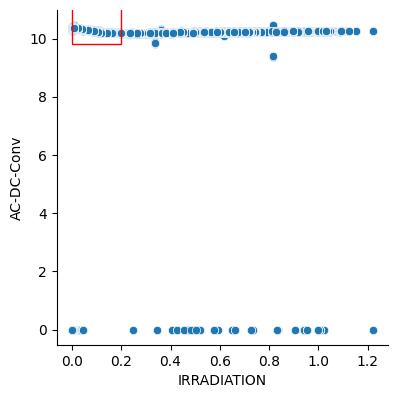

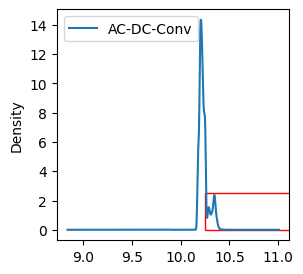

In [15]:
# Isolando os atributos AC-DC-Conv, IRRADIATION para análise
array = dataset_merged.values
df = pd.DataFrame(np.column_stack((array[:,11],array[:,10])),columns=['AC-DC-Conv','IRRADIATION'])
df['AC-DC-Conv'] = df['AC-DC-Conv'].fillna(0)

# Obtendo o axis para desenho do retângulo
ax = sns.pairplot(df, x_vars=['IRRADIATION'],y_vars=['AC-DC-Conv'], height=4)
# Desenhando retângulo para evidenciar área
ax.axes[0,0].add_patch(Rectangle((0, 9.8), 0.2, 10.3, edgecolor='red', facecolor='none', linewidth = 1))

# Resgatando gráfico de densidade anterior de forma exclusiva
df = pd.DataFrame(array[:,11],columns=['AC-DC-Conv'])
ax = df.plot(kind = 'density', subplots = False, layout = (3,3), sharex = False, figsize = (3,3))
ax.add_patch(Rectangle((10.25, 0), 10.5, 2.5, edgecolor='red', facecolor='none', linewidth = 1))
plt.show()

> **ANÁLISE DA VISUALIZAÇÃO:** Os retângulos vermelhos evidenciam a parcela de dados que representam a afirmação sobre os horários em que a conversão de energia feita pelo inversor é otimizada. Podemos então dizer que **pode haver uma relação inversa entre a quantidade de irradiação recebida pela célular solar e o rendimento de energia do inversor**, quando este realiza a conversão de corrente contínua para alternada. Estes dois gráficos acima nos fornecem o indício para esta hipótese.

> **5.3 Realizar a descoberta de quais os melhores momentos para a geração de energia solar nas plantas de origem dos dados.**

>- Um gráfico de linhas para visualizar a série temporal da produção diária de energia

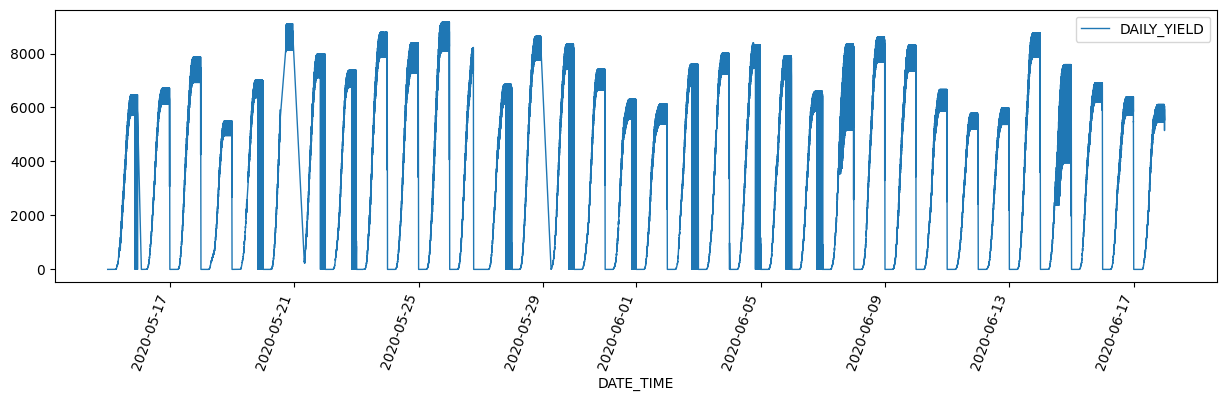

In [16]:
dataset_merged.plot(kind = 'line', x=0, y=["DAILY_YIELD"], layout = (6,6), figsize = (15,4), rot=70, linewidth=1)
plt.legend()
plt.show()

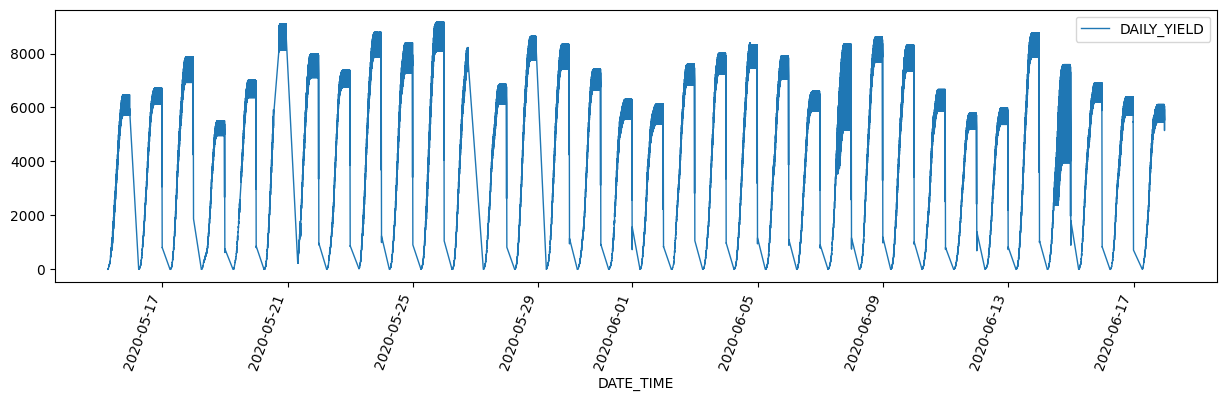

In [17]:
#Dropando dados do horário noturno
array = dataset_merged.drop(dataset_merged[dataset_merged["DAILY_YIELD"] == 0].index)
array.plot(kind = 'line', x=0, y=["DAILY_YIELD"], layout = (6,6), figsize = (15,4), rot=70, linewidth=1)
plt.show()

> **ANÁLISE DA VISUALIZAÇÃO:** Esse gráfico nos mostra a curva acendente de produção diária, em que no final, ao anoitecer, a produção estabiliza no topo. Ao atingir a meia noite, o contador de produção retorna para o zero, e começa uma nova curva acendente. Esse gráfico é ideal para analisar por exemplo, qual o dia de maior produção.

>- Cálculo das faixas horárias em que houve melhor geração de energia solar

>> **DECISÃO:** Neste ponto foi necessário computar um valor agregado chamado DELTA_YIELD, que representa a diferença de produção entre um registro e outro. Esse campo será necessário para gerarmos algumas visualizações.

In [18]:

dataset_tmp = pd.DataFrame(dataset_merged,copy=True)
dataset_tmp['DATE_TIME'] = pd.to_datetime(dataset_merged['DATE_TIME']).dt.strftime('%d-%m-%Y %H:%M')

sensors = pd.Series(dataset_tmp["SOURCE_KEY_PowerSens"]).unique()

dataset_delta = pd.DataFrame({'DATE_TIME': pd.Series( None, dtype='str'),'SOURCE_KEY_PowerSens': pd.Series( None, dtype=object), 'DELTA_YIELD': pd.Series( None, dtype='float64')})

# Fazendo a iteração sensor por sensor
for sensor in sensors:
    dataset_bysensor = dataset_tmp[dataset_tmp['SOURCE_KEY_PowerSens'] == sensor]
    x_idx = dataset_bysensor["DATE_TIME"]
    x_sens = dataset_bysensor["SOURCE_KEY_PowerSens"]
    x_data = dataset_bysensor["TOTAL_YIELD"]
    # Recalcular o DataFrame levando em conta o DELTA da produção de cada horário, ou seja, a diferença entre o registro corrente e o registro anterior
    dataset_delta = pd.concat([dataset_delta,pd.DataFrame({'DATE_TIME': pd.Series( x_idx, dtype='str'),'SOURCE_KEY_PowerSens': pd.Series( x_sens, dtype=object), 'DELTA_YIELD': pd.Series( x_data.diff(), dtype='float64')})])

# Preenchendo o delta com zeros onde não houver resultado
dataset_delta['DELTA_YIELD'] = dataset_delta['DELTA_YIELD'].fillna(0)
dataset_result = pd.DataFrame(dataset_delta.groupby(by=['DATE_TIME']).sum().nlargest(columns='DELTA_YIELD',n=100))
dataset_result.sort_values(by='DELTA_YIELD',ascending=False).head(20)


,DELTA_YIELD
DATE_TIME,
20-05-2020 17:30,67744.568
19-05-2020 12:30,23205.835
03-06-2020 14:15,13962.584
23-05-2020 12:15,7015.716
13-06-2020 12:00,6984.160
28-05-2020 12:15,6973.607
22-05-2020 11:45,6970.964
21-05-2020 07:45,6938.850
20-05-2020 12:15,6925.377


> **ANÁLISE:** Neste ponto encontramos um problema. No dia 19/05 as 12:30 e no dia 20/05/2020 as 17:30 os sensores reportaram captações de energia solar fora do padrão, quando analisado o DELTA, conforme visto acima. Isso nos dá a entender que existe um problema nos dados, pois o horário tende a ser um dos menores horário de captação solar. O atributo IRRADIATION nos confirma que os dados não estão corretos, pois ele traz um valor baixo (0.136164155), que é compatível com o horário. Ao analisar a tabela fonte, podemos notar que os sensores pararam de coletar por 1 hora no primeiro momento e por 4 horas e 15 minutos no segundo momento, e portanto o dado que veio em seguida foi acumulativo. Isso também se repete para mais um registro campeão visto em sequência.

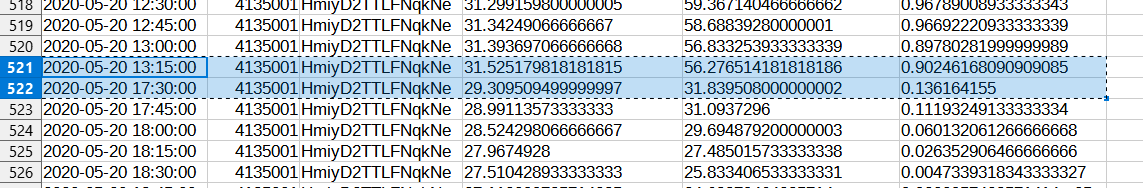

> **DECISÃO:** Iremos optar então por EXCLUIR os registros dessas datas como forma de facilitar a continuidade da análise. Para isto, basta removermos os 3 primeiros registros como mostrado abaixo:

In [19]:
# Limpando os dados do dataset DELTA para remover os registros incorretos
dataset_delta = dataset_delta.drop(\
   dataset_delta[dataset_delta['DATE_TIME'] == '20-05-2020 17:30'].index).drop(\
   dataset_delta[dataset_delta['DATE_TIME'] == '19-05-2020 12:30'].index).drop(\
   dataset_delta[dataset_delta['DATE_TIME'] == '03-06-2020 14:15'].index)

# Limpando os dados do dataset principal para remover os registros incorretos
dataset_merged = dataset_merged.drop(\
   dataset_merged[dataset_merged['DATE_TIME'] == '20-05-2020 17:30'].index).drop(\
   dataset_merged[dataset_merged['DATE_TIME'] == '19-05-2020 12:30'].index).drop(\
   dataset_merged[dataset_merged['DATE_TIME'] == '03-06-2020 14:15'].index)

# Limpando os dados do dataset de resultado (indexado)
dataset_result = dataset_result.drop(index='20-05-2020 17:30')
dataset_result = dataset_result.drop(index='19-05-2020 12:30')
dataset_result = dataset_result.drop(index='03-06-2020 14:15')


,DELTA_YIELD
DATE_TIME,
23-05-2020 12:15,7015.716
13-06-2020 12:00,6984.160
28-05-2020 12:15,6973.607
22-05-2020 11:45,6970.964
21-05-2020 07:45,6938.850
...,...
24-05-2020 11:00,6315.751
20-05-2020 11:15,6312.126
02-06-2020 13:00,6308.377


In [20]:
# Contar quais as 100 faixas horárias campeãs de coleta (3 foram excluídas por estarem inconsistentes)
dataset_result

,DELTA_YIELD
DATE_TIME,
23-05-2020 12:15,7015.716
13-06-2020 12:00,6984.160
28-05-2020 12:15,6973.607
22-05-2020 11:45,6970.964
21-05-2020 07:45,6938.850
...,...
24-05-2020 11:00,6315.751
20-05-2020 11:15,6312.126
02-06-2020 13:00,6308.377


> **DESCOBERTA:** As faixas horárias acima estão na lista das 100 coletas com maior geração de energia. Notamos que os valores são bastante próximos uns dos outros, vendo que a diferença de geração é bem pequena nos horário de pico. Existe mais um registro suspeito dentro os listados, que é o 21-05-2020 07:45, pois não é um horário com boa irradiação solar. Pode ser mais um dos problemas de coleta acumulada.

> - Vamos agora descobrir quais as 10 datas que tiveram maior geração de energia
solar.

In [24]:
dataset_tmp = pd.DataFrame(dataset_delta,copy=True)

dataset_tmp["DATE"]  = pd.to_datetime(dataset_tmp["DATE_TIME"]).dt.date

z = pd.DataFrame(np.column_stack((dataset_tmp.values[:,3],dataset_tmp.values[:,2])),columns=['DATE','DELTA_YIELD'])
pd.DataFrame(z).groupby(by="DATE").sum().sort_values("DELTA_YIELD",ascending=False).head(10)


,DELTA_YIELD
DATE,
2020-05-25,192862.0
2020-05-23,186728.0
2020-06-13,185308.0
2020-05-28,183432.0
2020-08-06,182943.0
2020-04-06,178830.0
2020-05-29,178111.0
2020-09-06,176854.0
2020-05-24,174989.0


> Por fim, vamos copiar o campo DELTA_YIELD para o dataset principal:

In [25]:
# Copiando o valor agregado computado
dataset_merged['DELTA_YIELD'] = dataset_delta['DELTA_YIELD']
dataset_merged.head(1000)


,DATE_TIME,PLANT_ID,SOURCE_KEY_PowerSens,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,SOURCE_KEY_WeatherSens,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC-AC-Conv,DELTA_YIELD
0,2020-05-15 00:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,0.000000,6259559.000,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000,NaN,0.000
1,2020-05-15 00:00:00,4135001,1IF53ai7Xc0U56Y,0.000000,0.000000,0.000000,6183645.000,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000,NaN,0.000
2,2020-05-15 00:00:00,4135001,3PZuoBAID5Wc2HD,0.000000,0.000000,0.000000,6987759.000,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000,NaN,0.000
3,2020-05-15 00:00:00,4135001,7JYdWkrLSPkdwr4,0.000000,0.000000,0.000000,7602960.000,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000,NaN,0.000
4,2020-05-15 00:00:00,4135001,McdE0feGgRqW7Ca,0.000000,0.000000,0.000000,7158964.000,HmiyD2TTLFNqkNe,25.184316,22.857507,0.000000,NaN,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2020-05-15 11:30:00,4135001,7JYdWkrLSPkdwr4,7328.000000,716.928571,2242.000000,7605202.000,HmiyD2TTLFNqkNe,30.287073,49.841364,0.557069,10.221381,177.125
996,2020-05-15 11:30:00,4135001,McdE0feGgRqW7Ca,6471.285714,633.857143,2518.714286,7161482.714,HmiyD2TTLFNqkNe,30.287073,49.841364,0.557069,10.209376,185.589
997,2020-05-15 11:30:00,4135001,VHMLBKoKgIrUVDU,7761.142857,759.214286,2252.285714,7208660.286,HmiyD2TTLFNqkNe,30.287073,49.841364,0.557069,10.222599,179.286
998,2020-05-15 11:30:00,4135001,WRmjgnKYAwPKWDb,8600.571429,840.085714,2217.000000,7030890.000,HmiyD2TTLFNqkNe,30.287073,49.841364,0.557069,10.237731,186.000


> **5.3 Medir a correlação entre os atributos de Irradiação solar, temperatura ambiente e produção de energia.**

> O primeiro passo para conseguirmos traçar essa correlação é normalizar o dataset, conforme faremos abaixo:

In [26]:
# Normalizando o dataset para comparação de padrões de dados
norm = dataset_merged.drop(columns=["DATE_TIME","SOURCE_KEY_PowerSens","SOURCE_KEY_WeatherSens"], inplace=False)
normalized_df=(norm-norm.min())/(norm.max()-norm.min())

normalized_df

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DC-AC-Conv,DELTA_YIELD
0,NaN,0.0,0.0,0.000000,0.045644,0.322190,0.099506,0.0,NaN,0.0
1,NaN,0.0,0.0,0.000000,0.000000,0.322190,0.099506,0.0,NaN,0.0
2,NaN,0.0,0.0,0.000000,0.483481,0.322190,0.099506,0.0,NaN,0.0
3,NaN,0.0,0.0,0.000000,0.853376,0.322190,0.099506,0.0,NaN,0.0
4,NaN,0.0,0.0,0.000000,0.586420,0.322190,0.099506,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
68769,NaN,0.0,0.0,0.651206,0.663404,0.101709,0.048255,0.0,NaN,0.0
68770,NaN,0.0,0.0,0.561784,0.508038,0.101709,0.048255,0.0,NaN,0.0
68771,NaN,0.0,0.0,0.635054,0.641880,0.101709,0.048255,0.0,NaN,0.0
68772,NaN,0.0,0.0,0.634836,0.240338,0.101709,0.048255,0.0,NaN,0.0


>> **5.3.1 CORRELAÇÃO:** Produção de energia X temperatura ambiente (intervalos de 15 minutos)

>> Agora iremos gerar a **computação de valores agregados** (normalizados) em novos campos para usar na geração da visualização.

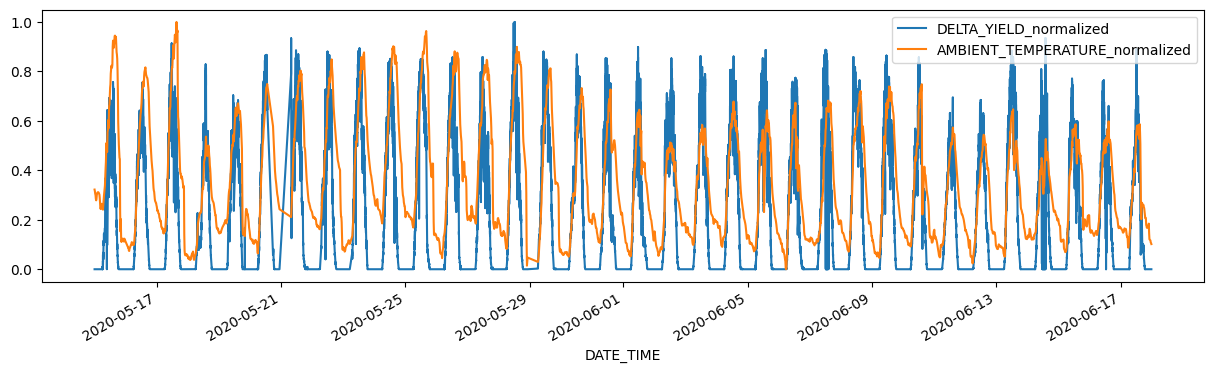

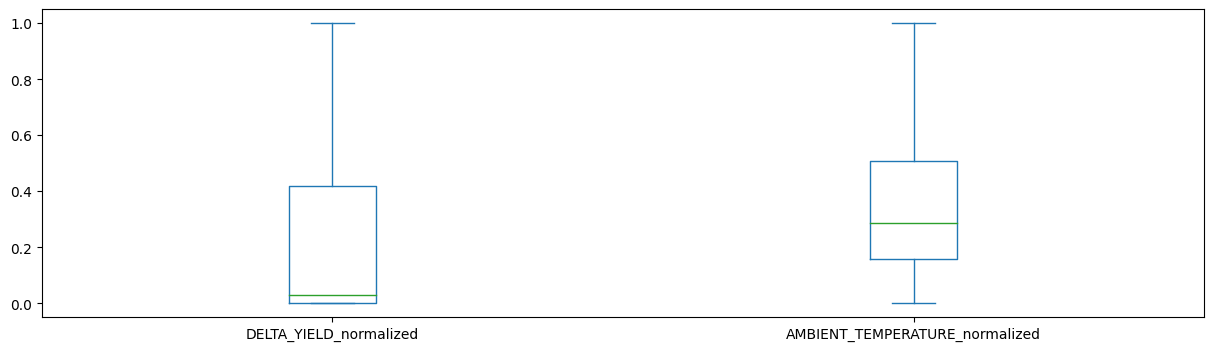

In [27]:
dataset_merged["DELTA_YIELD_normalized"] = normalized_df["DELTA_YIELD"]
dataset_merged["AMBIENT_TEMPERATURE_normalized"] = normalized_df["AMBIENT_TEMPERATURE"]
dataset_merged.plot(kind = 'line', x=0, y=["DELTA_YIELD_normalized","AMBIENT_TEMPERATURE_normalized"], layout = (12,12), figsize = (15,4))
dataset_merged.plot(kind = 'box', x=0, y=["DELTA_YIELD_normalized","AMBIENT_TEMPERATURE_normalized"], layout = (12,12), figsize = (15,4))
plt.show()

>***ANÁLISE DE CORRELAÇÃO:*** A visualização do gráfico de linhas nos mostra um comportamento parecido dos atributos, com eles crescendo e diminuindo em momentos conjuntos. Contudo, a visualização das estatísticas descritivas (desvio padrão, média, mediana, etc) usadas para compôr o boxplot não coincidem, e nos mostram que o comportamento dos atributos não é tão parecido quanto imaginamos ao olhar o gráfico de linhas puramente. Neste caso, podemos inclusive dizer que a normalização pode estar nos enganando. Vamos fazer uma análise adicional sem usar a normalização:

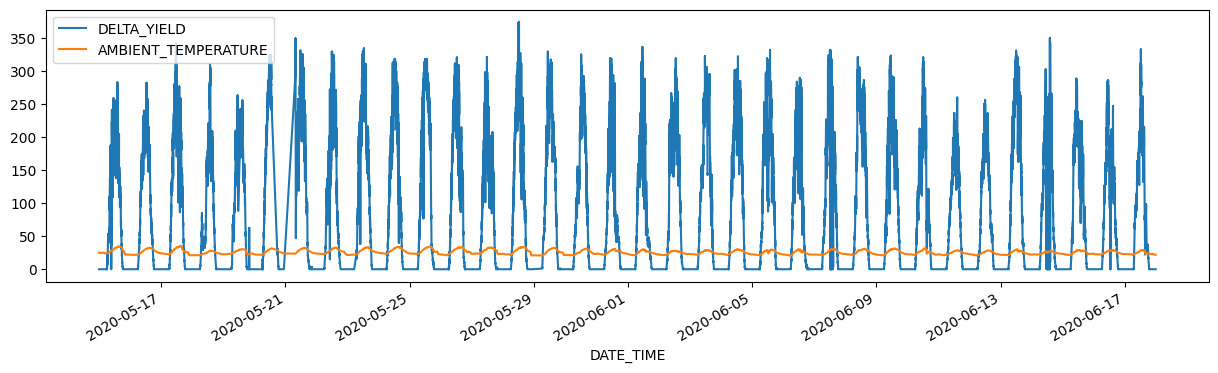

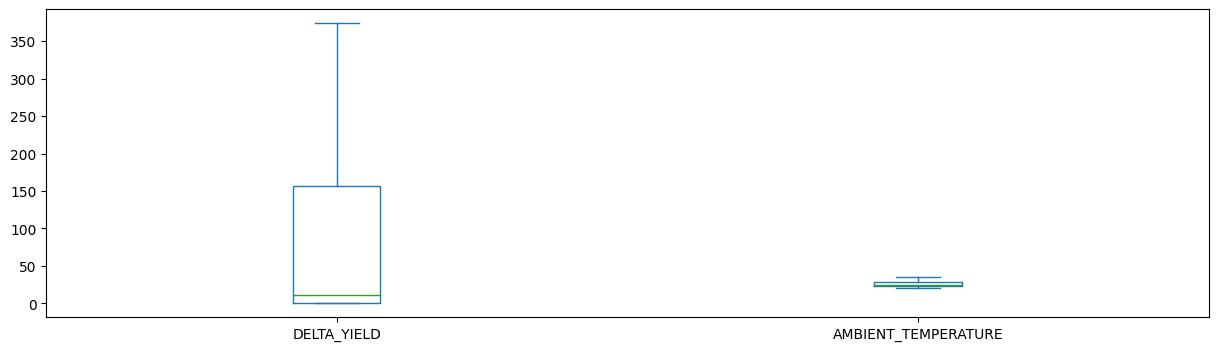

In [28]:
dataset_merged.plot(kind = 'line', x=0, y=["DELTA_YIELD","AMBIENT_TEMPERATURE"], layout = (12,12), figsize = (15,4))
dataset_merged.plot(kind = 'box', x=0, y=["DELTA_YIELD","AMBIENT_TEMPERATURE"], layout = (12,12), figsize = (15,4))
plt.show()

> **BINGO:** A ilusão caiu. Os dados realmente não parecem ter nenhuma correção, quando vistos normalizados e da forma bruta.

>> **5.3.1 CORRELAÇÃO:** Produção de energia X Irradiação solar (intervalos de 15 minutos)

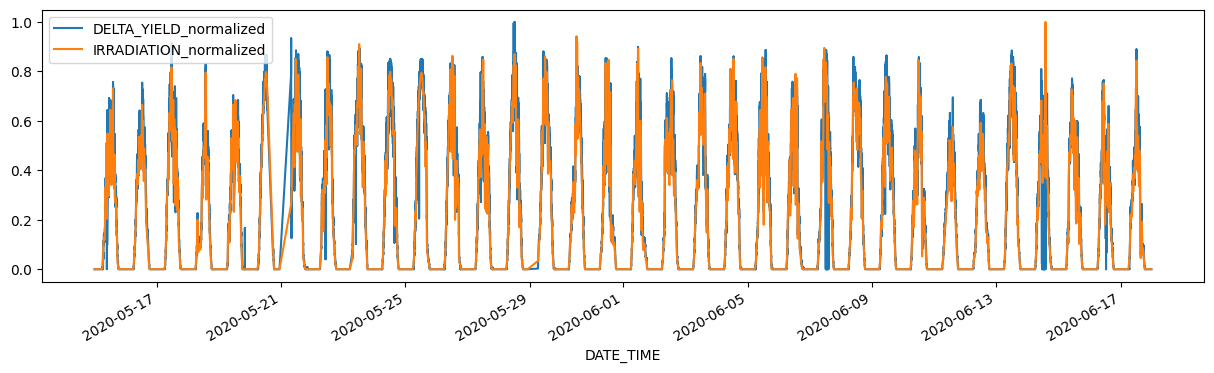

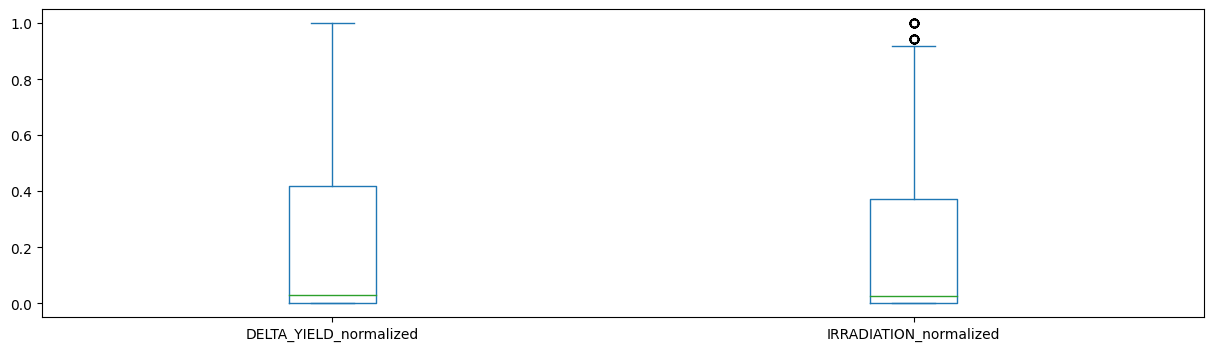

In [29]:
dataset_merged["DELTA_YIELD_normalized"] = normalized_df["DELTA_YIELD"]
dataset_merged["IRRADIATION_normalized"] = normalized_df["IRRADIATION"]
dataset_merged.plot(kind = 'line', x=0, y=["DELTA_YIELD_normalized","IRRADIATION_normalized"], layout = (6,6), figsize = (15,4))
dataset_merged.plot(kind = 'box', x=0, y=["DELTA_YIELD_normalized","IRRADIATION_normalized"], layout = (6,6), figsize = (15,4))
plt.show()

>***ANÁLISE DE CORRELAÇÃO:*** É um pouco óbvio dizer que quanto maior a irradiação solar, maior a produção de energia. Mas ver isso nos dados dá gosto. Tanto o gráfico de linhas quanto o boxplot nos mostram uma aproximação quase que perfeita dos padrões de dados. A normalização ajuda neste sentido. Podemos dizer que estes dados possuem uma correlação quase que perfeita.

> **DECISÃO:** Podemos visualizar Outliers nos dados de irradiação. Estes dados podem ser excluídos para melhoria do resultado final de correlação.

# ***6. Conclusão***

Em nosso trabalho, realizamos a **coleta dos dados brutos** em nossa fonte de dados, e disponibilizamos o acesso para uso dentro de nosso ambiente de  notebook python.

Definimos **passos de pré-processamento**, sendo estes: (1) Limpeza de registros inconsistentes (dados de produção acumulados e dados de irradiação fora do normal); (2) conversão de datas para formatos específicos (3) Merge (join) de fontes de dados, para conseguir analisar todos os atributos em dataframe único.

Computamos alguns **valores agregados** para conseguir responder a algumas perguntas, sendo eles: (1) a taxa de conversão do inversor (de DC para AC); (2) o DELTA de produção entre as faixas horárias; (3) a produção diária normalizada; (4) a temperatura ambiente normalizada e (5) a irradiação normalizada.

**Analisamos a relação de conversão DC/AC** e descobrimos que existe uma possível influência entre a quantidade de energia e o rendimento do inversor. Ou seja, ao final da manhã e no final da tarde, essa relação de conversão atinge valores relativos levemente mais altos do que os valores computados quando a geração de energia é maior.

**Analisamos as 100 faixas horárias** (de 15 em 15 minutos) onde há maior geração de energia.

**Analisamos as 10 datas** onde houve maior geração de energia.

Traçamos **análise de correlação** entre: (1) Produção de energia e temperatura ambiente e (2) Produção de energia e irradiação. No primeiro par encontramos uma correlação ruim , e no segundo par conseguimos uma boa correlação.

Concluindo, podemos afirmar que conseguimos realizar uma análise exploratória integrada e produtiva nos dados disponibilizados, trazendo a tona algumas questões que não são perceptíveis quando analisamos tabelas de dados ou visualizações isoladas. Conseguimos através de um conjunto de técnicas e visualizações descobrir informações e fazer determinadas correlações que só são possíveis através deste meio.